#### Predicting customer buying behaviour

**Build a predictive model to understand factors that influence buying behaviour**

With your predictive model, it is important to interpret the results in order to understand how “predictive” the data really was and whether we can feasibly use it to predict the target outcome (customers buying holidays). Therefore, you should evaluate the model's performance and output how each variable contributes to the predictive model's power.

#### Approach
- Explore and prepare the dataset
- Data Quality analysis
- EDA and visualizaton
- Clean the dataset accordingly.
- Train a machine learning model
- Evaluate the model with appropriate metrics.
- Summary 

In [1]:
#Import the basic libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# Load the dataset

df = pd.read_csv('customer_booking.csv', encoding="ISO-8859-1")
df.head()

num_passengers sales_channel  trip_type  purchase_lead  length_of_stay  \
0               2      Internet  RoundTrip            262              19   
1               1      Internet  RoundTrip            112              20   
2               2      Internet  RoundTrip            243              22   
3               1      Internet  RoundTrip             96              31   
4               2      Internet  RoundTrip             68              22   

   flight_hour flight_day   route booking_origin  wants_extra_baggage  \
0            7        Sat  AKLDEL    New Zealand                    1   
1            3        Sat  AKLDEL    New Zealand                    0   
2           17        Wed  AKLDEL          India                    1   
3            4        Sat  AKLDEL    New Zealand                    0   
4           15        Wed  AKLDEL          India                    1   

   wants_preferred_seat  wants_in_flight_meals  flight_duration  \
0                     0                      0             5.52   
1                     0                      0             5.52   
2                     1                      0             5.52   
3                     0                      1             5.52   
4                     0                      1             5.52   

   booking_complete  
0                 0  
1                 0  
2                 0  
3                 0  
4                 0

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   num_passengers         50000 non-null  int64  
 1   sales_channel          50000 non-null  object 
 2   trip_type              50000 non-null  object 
 3   purchase_lead          50000 non-null  int64  
 4   length_of_stay         50000 non-null  int64  
 5   flight_hour            50000 non-null  int64  
 6   flight_day             50000 non-null  object 
 7   route                  50000 non-null  object 
 8   booking_origin         50000 non-null  object 
 9   wants_extra_baggage    50000 non-null  int64  
 10  wants_preferred_seat   50000 non-null  int64  
 11  wants_in_flight_meals  50000 non-null  int64  
 12  flight_duration        50000 non-null  float64
 13  booking_complete       50000 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.3+ 

**Observations**
- There are 5000 rows with 13 columns of data with data types:float, int and object.
- 'booking_complete' column is our Y_target and the rest are X_features.
- no missing values.

In [4]:
df.describe()

num_passengers  purchase_lead  length_of_stay  flight_hour  \
count    50000.000000   50000.000000     50000.00000  50000.00000   
mean         1.591240      84.940480        23.04456      9.06634   
std          1.020165      90.451378        33.88767      5.41266   
min          1.000000       0.000000         0.00000      0.00000   
25%          1.000000      21.000000         5.00000      5.00000   
50%          1.000000      51.000000        17.00000      9.00000   
75%          2.000000     115.000000        28.00000     13.00000   
max          9.000000     867.000000       778.00000     23.00000   

       wants_extra_baggage  wants_preferred_seat  wants_in_flight_meals  \
count         50000.000000          50000.000000           50000.000000   
mean              0.668780              0.296960               0.427140   
std               0.470657              0.456923               0.494668   
min               0.000000              0.000000               0.000000   
25%               0.000000              0.000000               0.000000   
50%               1.000000              0.000000               0.000000   
75%               1.000000              1.000000               1.000000   
max               1.000000              1.000000               1.000000   

       flight_duration  booking_complete  
count     50000.000000      50000.000000  
mean          7.277561          0.149560  
std           1.496863          0.356643  
min           4.670000          0.000000  
25%           5.620000          0.000000  
50%           7.570000          0.000000  
75%           8.830000          0.000000  
max           9.500000          1.000000

In [5]:
df.describe(include='object')

sales_channel  trip_type flight_day   route booking_origin
count          50000      50000      50000   50000          50000
unique             2          3          7     799            104
top         Internet  RoundTrip        Mon  AKLKUL      Australia
freq           44382      49497       8102    2680          17872

In [6]:
# To confirm there are no null values in the dataset.

df.isnull().sum()

num_passengers           0
sales_channel            0
trip_type                0
purchase_lead            0
length_of_stay           0
flight_hour              0
flight_day               0
route                    0
booking_origin           0
wants_extra_baggage      0
wants_preferred_seat     0
wants_in_flight_meals    0
flight_duration          0
booking_complete         0
dtype: int64

array([[<AxesSubplot:title={'center':'num_passengers'}>,
        <AxesSubplot:title={'center':'purchase_lead'}>,
        <AxesSubplot:title={'center':'length_of_stay'}>],
       [<AxesSubplot:title={'center':'flight_hour'}>,
        <AxesSubplot:title={'center':'wants_extra_baggage'}>,
        <AxesSubplot:title={'center':'wants_preferred_seat'}>],
       [<AxesSubplot:title={'center':'wants_in_flight_meals'}>,
        <AxesSubplot:title={'center':'flight_duration'}>,
        <AxesSubplot:title={'center':'booking_complete'}>]], dtype=object)

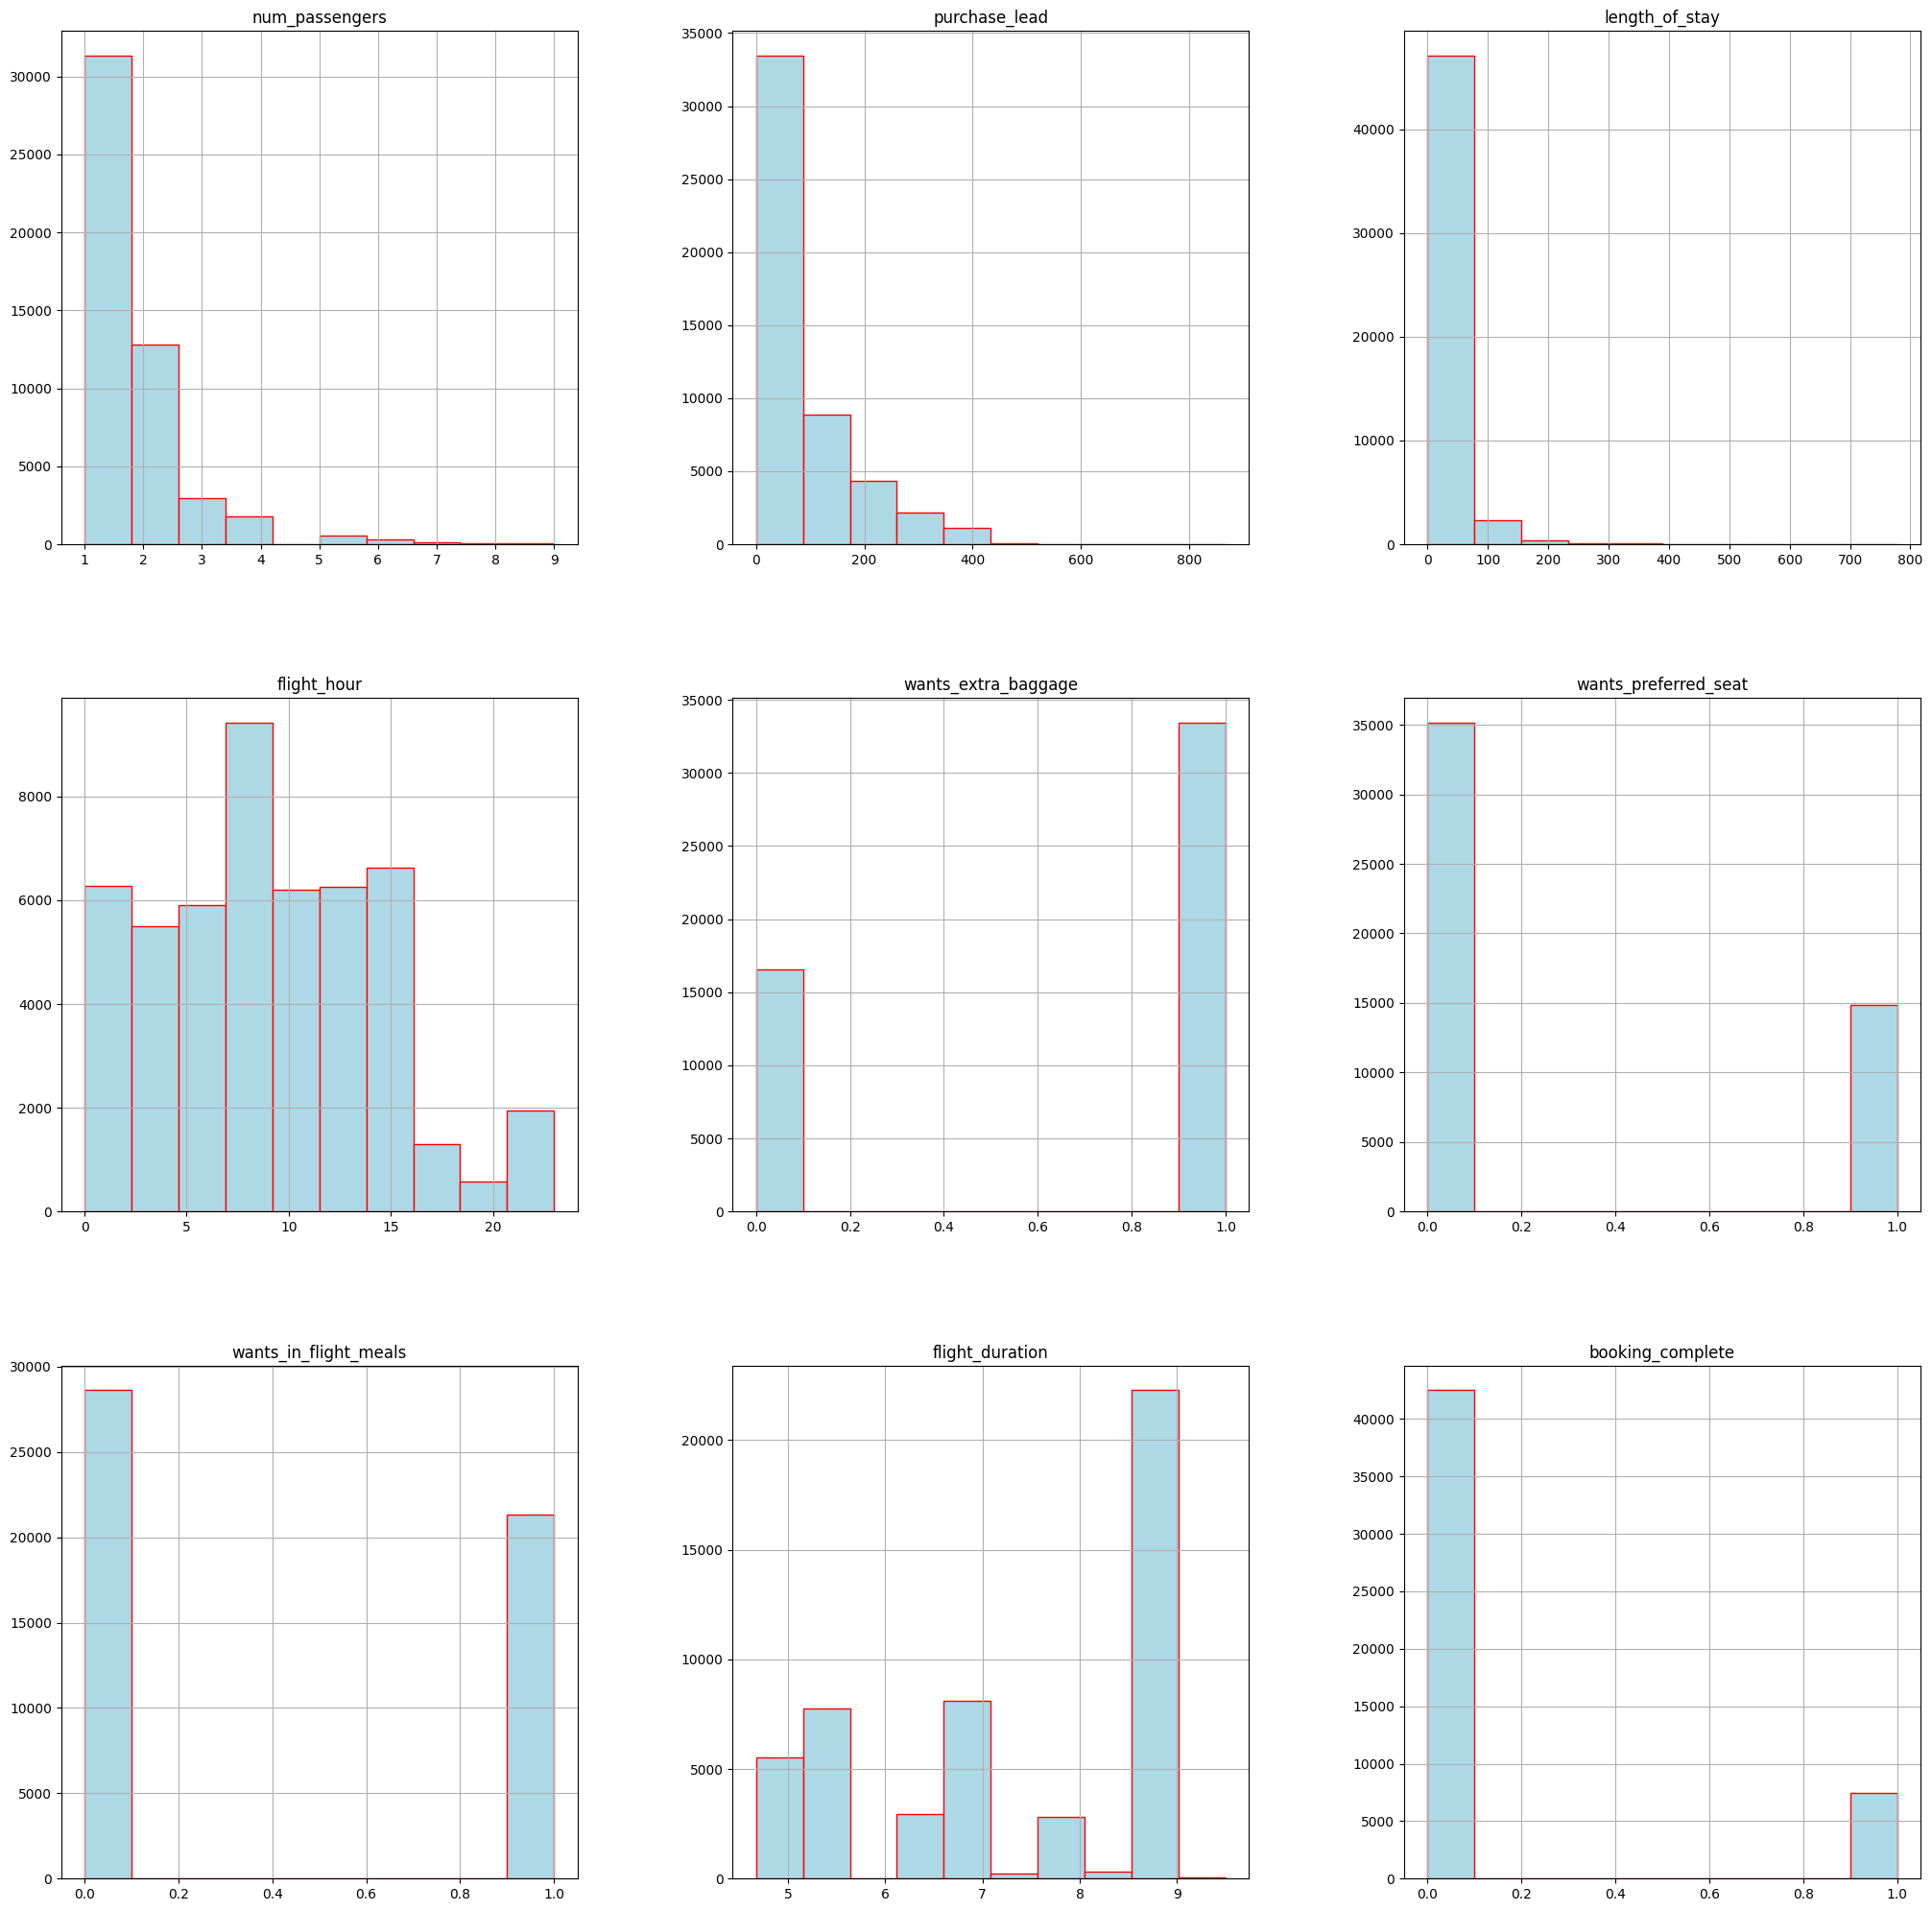

In [25]:
## To visualize data distribution, lets plot some histograms
df.hist(figsize=(25,25),color = "lightblue", ec="red")

<AxesSubplot:xlabel='count', ylabel='booking_origin'>

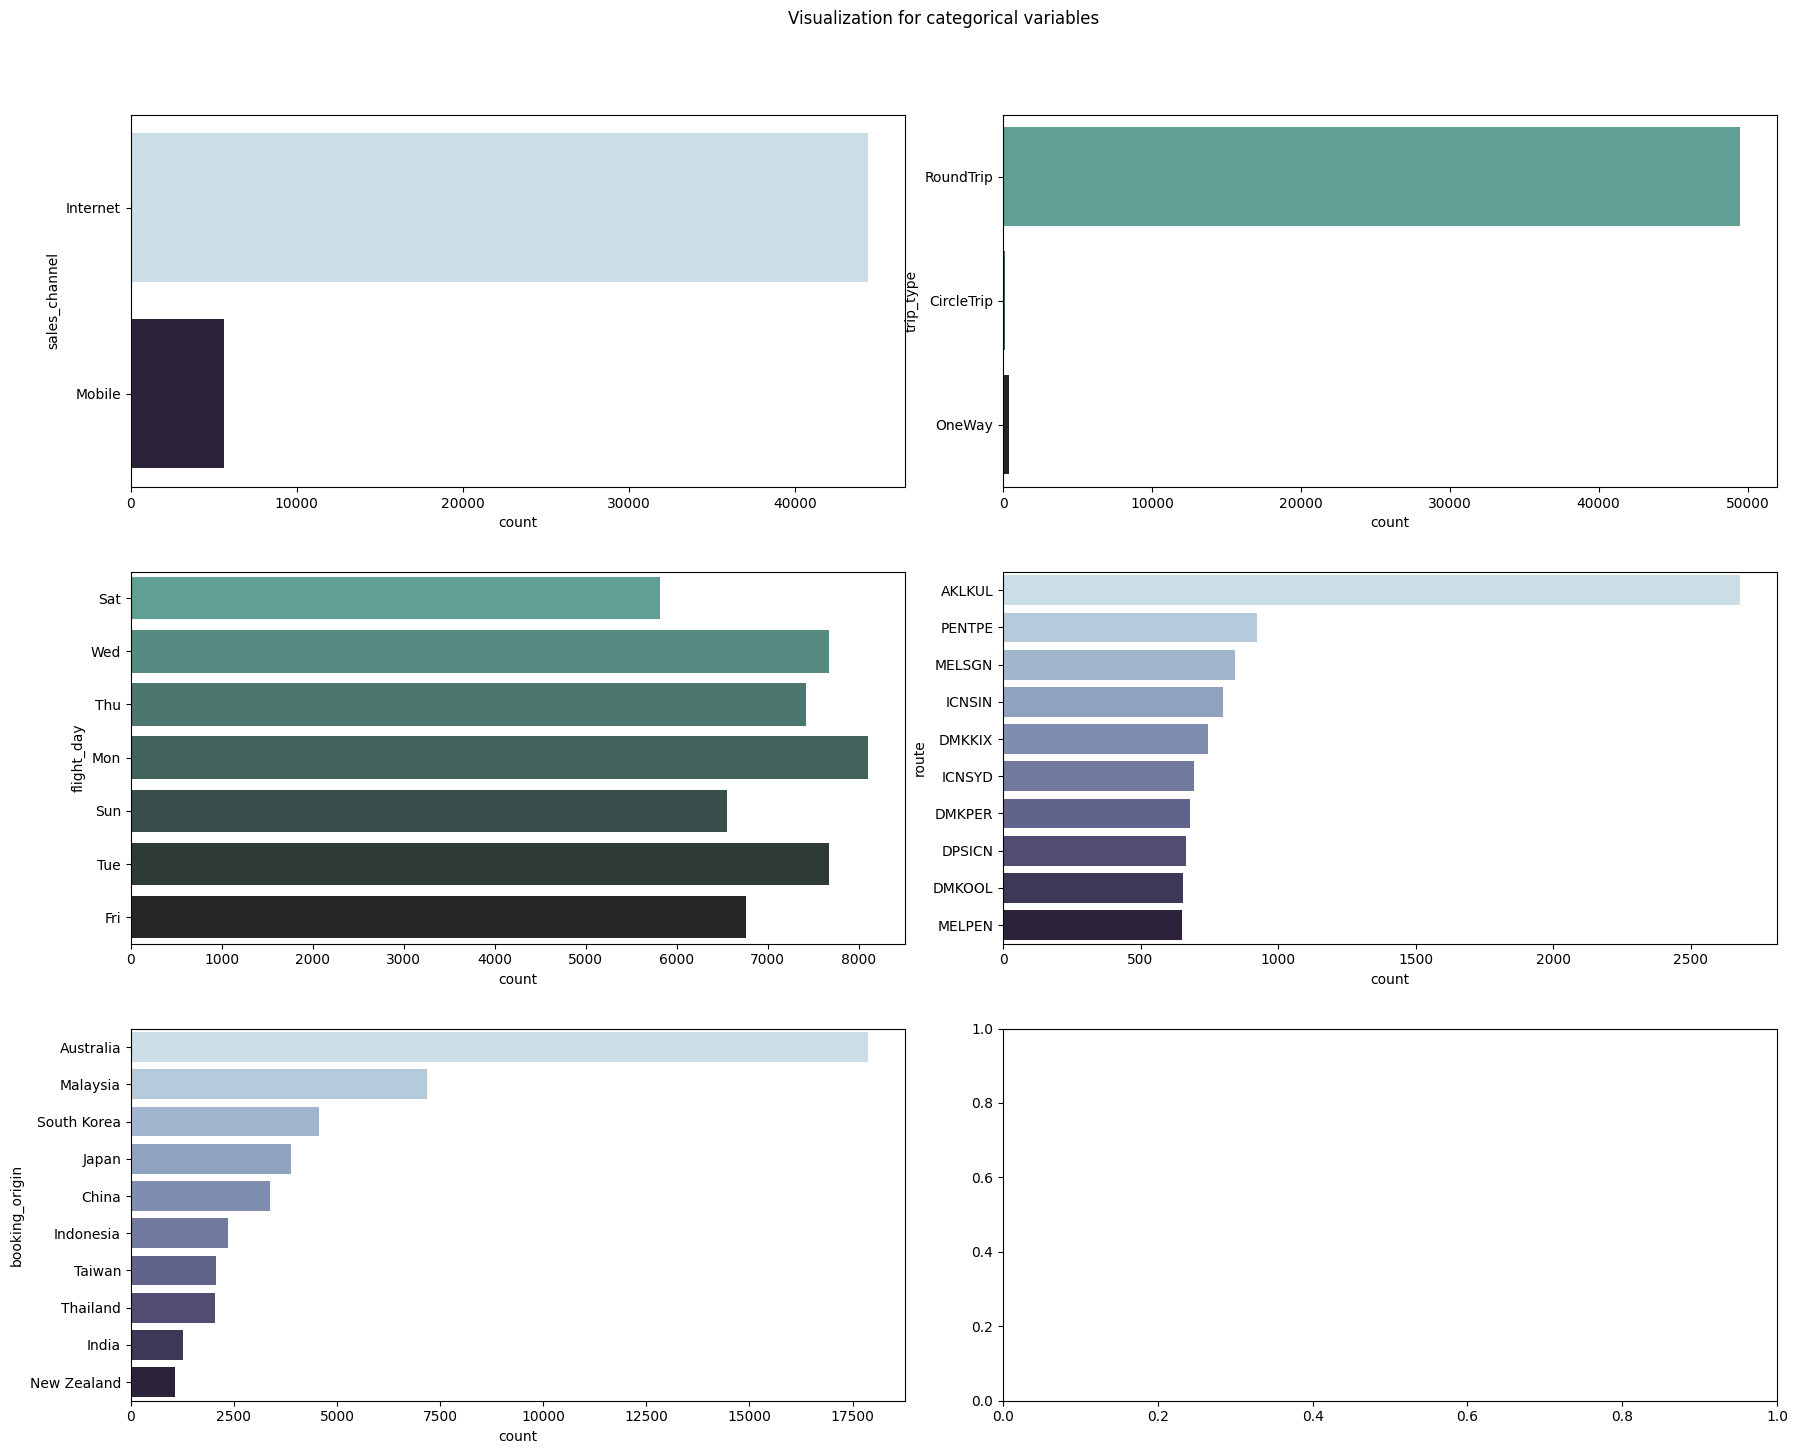

In [27]:
#Lets plot graphs for categorical data type

fig, axes = plt.subplots(3,2)
fig.suptitle('Visualization for categorical variables')
plt.gcf().set_size_inches(18, 15)
fig.tight_layout(pad=4.0)

sns.countplot(ax=axes[0,0], y = df['sales_channel'], data=df, palette='ch:s=.25,rot=-.25')
sns.countplot(ax=axes[0,1], y = df['trip_type'],data=df, palette="dark:#5A9_r")
sns.countplot(ax=axes[1,0], y = df['flight_day'],data=df, palette="dark:#5A9_r")
sns.countplot(ax=axes[1,1], y = df['route'],data=df,order=df.route.value_counts().iloc[:10].index,palette="ch:s=.25,rot=-.25")
sns.countplot(ax=axes[2,0], y = df['booking_origin'],data=df,order=df.booking_origin.value_counts().iloc[:10].index,palette="ch:s=.25,rot=-.25")


#### Label encoding
https://stackoverflow.com/questions/24458645/label-encoding-across-multiple-columns-in-scikit-learn

In [105]:
from sklearn.preprocessing import LabelEncoder

In [106]:
class MultiColumnLabelEncoder:
    def __init__(self,columns = None):
        self.columns = columns # array of column names to encode

    def fit(self,X,y=None):
        return self # not relevant here

    def transform(self,X):
        '''
        Transforms columns of X specified in self.columns using
        LabelEncoder(). If no columns specified, transforms all
        columns in X.
        '''
        output = X.copy()
        if self.columns is not None:
            for col in self.columns:
                output[col] = LabelEncoder().fit_transform(output[col])
        else:
            for colname,col in output.iteritems():
                output[colname] = LabelEncoder().fit_transform(col)
        return output

    def fit_transform(self,X,y=None):
        return self.fit(X,y).transform(X)

In [129]:
df = MultiColumnLabelEncoder(columns = ['sales_channel','trip_type','flight_day','route','booking_origin']).fit_transform(df)

In [279]:
df.to_csv('df')

#### Lets split the dataset into train, valid and test

In [133]:
from fast_ml.model_development import train_valid_test_split

X_train, y_train, X_valid, y_valid, X_test, y_test = train_valid_test_split(df, target = 'booking_complete', 
                                                                            train_size=0.8, valid_size=0.1, test_size=0.1)

print('X_train shape is :{}'.format(X_train.shape))
print('y_train shape is :{}'.format(y_train.shape))
print('X_valid shape is :{}'.format(X_valid.shape))
print('y_valid shape is :{}'.format(y_valid.shape))
print('X_test shape is :{}'.format(X_test.shape))
print('y_test shape is :{}'.format(y_test.shape))


X_train shape is :(40000, 13)
y_train shape is :(40000,)
X_valid shape is :(5000, 13)
y_valid shape is :(5000,)
X_test shape is :(5000, 13)
y_test shape is :(5000,)


#### Lets check for data imbalance as that will cause biasnes in our 'Outcome' column

In [134]:
df.booking_complete.value_counts()

0    42522
1     7478
Name: booking_complete, dtype: int64

In [135]:
train_df = X_train.merge(y_train, left_index=True, right_index=True)

In [136]:
train_df.booking_complete.value_counts()

0    34020
1     5980
Name: booking_complete, dtype: int64

[Text(0.5, 1.0, 'Data distribution(Train_df) BEFORE oversampling technique')]

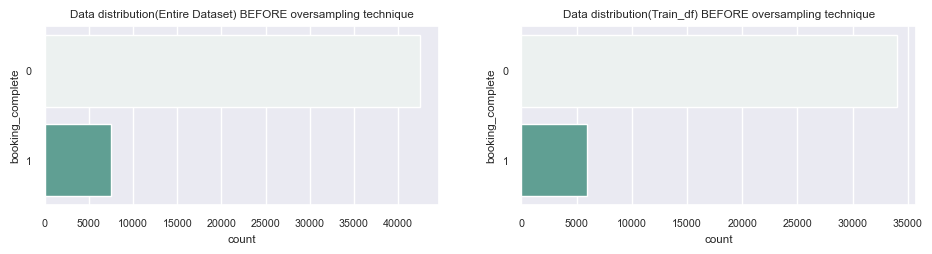

In [137]:
sns.set(font_scale=0.7)
fig, axes = plt.subplots(1,2)
plt.gcf().set_size_inches(10,3)
fig.tight_layout(pad=4.0)

sns.countplot(ax=axes[0],y='booking_complete', data=df, palette="light:#5A9").set(title='Data distribution(Entire Dataset) BEFORE oversampling technique')
sns.countplot(ax=axes[1],y='booking_complete', data=train_df, palette="light:#5A9").set(title='Data distribution(Train_df) BEFORE oversampling technique')

In [138]:
from imblearn.over_sampling import RandomOverSampler
from collections import Counter
# instantiating the random over sampler 
ros = RandomOverSampler()
# resampling X, y
X_ros, y_ros = ros.fit_resample(train_df.drop('booking_complete', axis=1),train_df['booking_complete'])
# new class distribution 
print(Counter(y_ros))

Counter({0: 34020, 1: 34020})


In [139]:
X_ros.shape, y_ros.shape

((68040, 13), (68040,))

In [140]:
ros_df = X_ros.merge(y_ros, left_index=True, right_index=True)

In [141]:
print('Dataset shape before oversampling technique:{}'.format(train_df.shape) )
print('Dataset shape after oversampling technique:{}'.format(ros_df.shape))

Dataset shape before oversampling technique:(40000, 14)
Dataset shape after oversampling technique:(68040, 14)


[Text(0.5, 1.0, 'Data distribution (train_df) AFTER oversampling technique')]

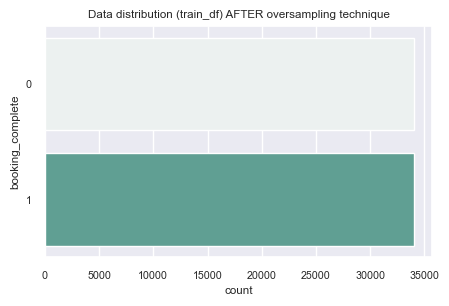

In [142]:
plt.gcf().set_size_inches(5,3)
sns.countplot(y='booking_complete', data=ros_df, palette="light:#5A9").set(title='Data distribution (train_df) AFTER oversampling technique')

#### Lets plot some scatter plots to understand the relationships between the variables.

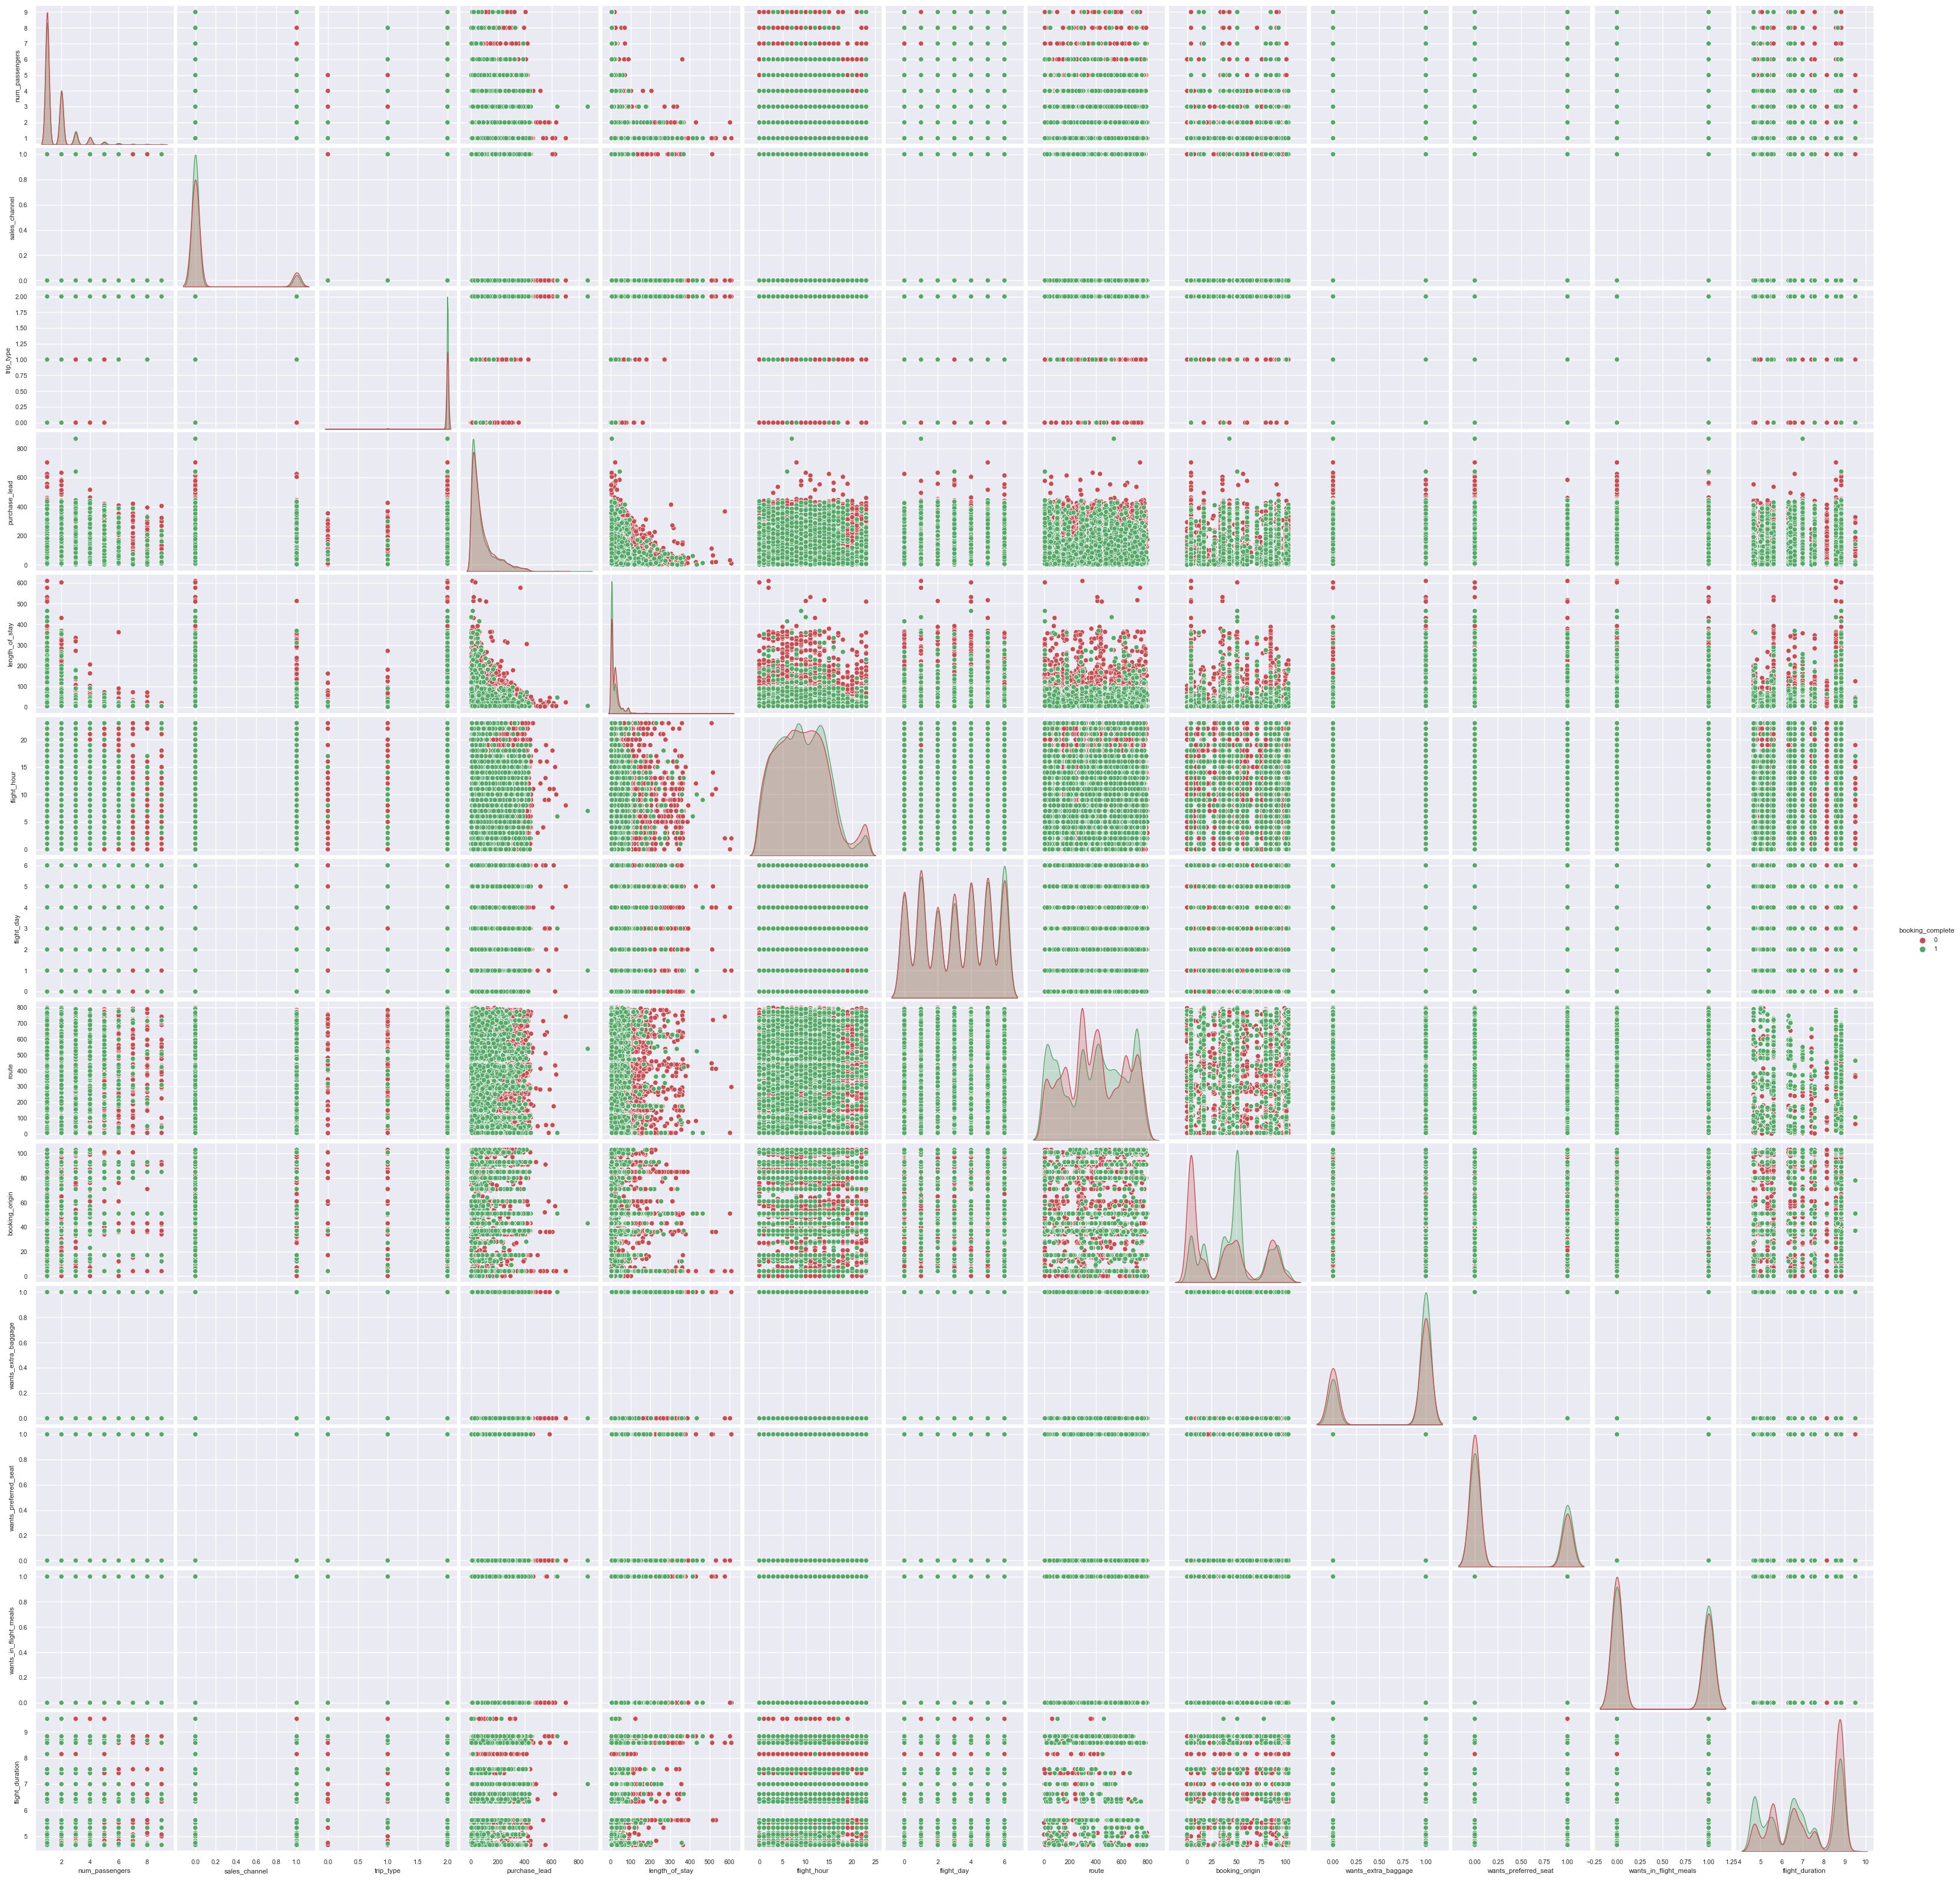

In [143]:
sns.pairplot(ros_df, hue='booking_complete', palette =['r','g'])

#### Lets visualize for outliers

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]),
 [Text(0, 0, 'num_passengers'),
  Text(1, 0, 'sales_channel'),
  Text(2, 0, 'trip_type'),
  Text(3, 0, 'purchase_lead'),
  Text(4, 0, 'length_of_stay'),
  Text(5, 0, 'flight_hour'),
  Text(6, 0, 'flight_day'),
  Text(7, 0, 'route'),
  Text(8, 0, 'booking_origin'),
  Text(9, 0, 'wants_extra_baggage'),
  Text(10, 0, 'wants_preferred_seat'),
  Text(11, 0, 'wants_in_flight_meals'),
  Text(12, 0, 'flight_duration')])

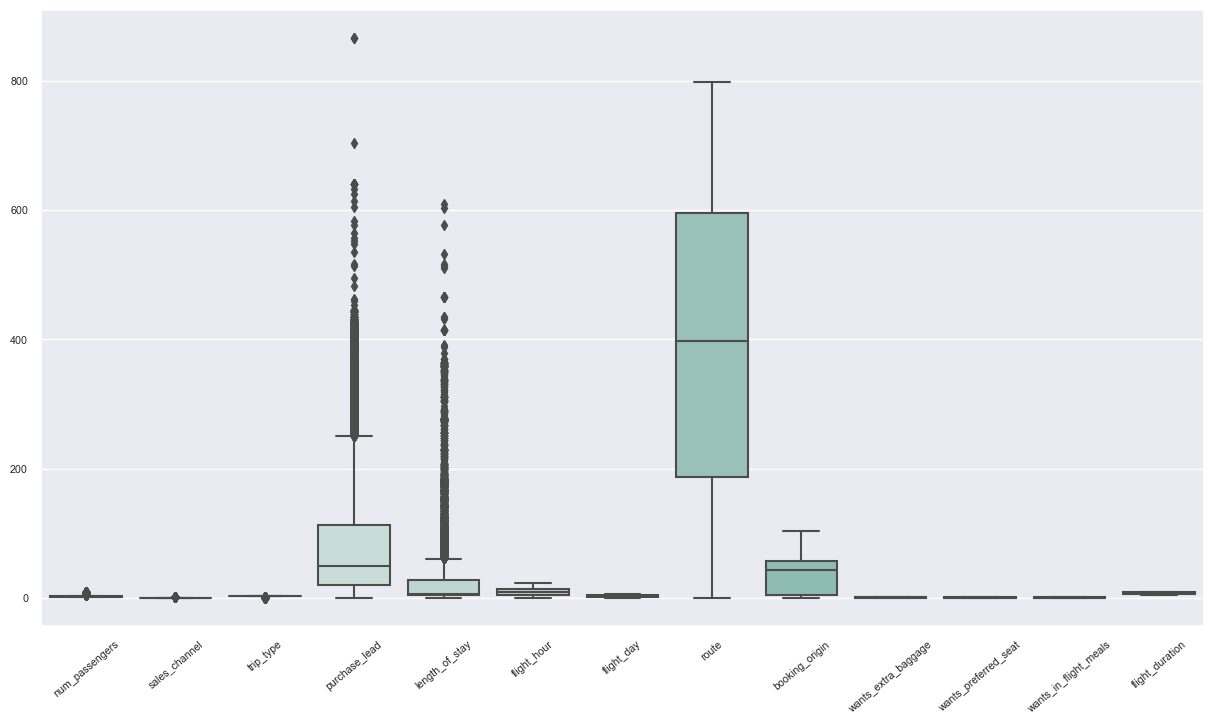

In [153]:
plt.figure(figsize=(15,8))
sns.boxplot(data=ros_df.drop("booking_complete", axis=1), palette="light:#5A9")
plt.xticks(rotation=40)


In [145]:
ros_df.describe().drop('count',axis=0)

num_passengers  sales_channel  trip_type  purchase_lead  length_of_stay  \
mean        1.610597       0.098942   1.991240      82.639712       21.625529   
std         1.034508       0.298586   0.109028      89.596637       32.940892   
min         1.000000       0.000000   0.000000       0.000000        0.000000   
25%         1.000000       0.000000   2.000000      20.000000        5.000000   
50%         1.000000       0.000000   2.000000      49.000000        6.000000   
75%         2.000000       0.000000   2.000000     112.000000       27.000000   
max         9.000000       1.000000   2.000000     867.000000      610.000000   

      flight_hour  flight_day       route  booking_origin  \
mean     9.098280    3.095194  388.279233       42.394636   
std      5.329576    2.042035  232.575362       31.185332   
min      0.000000    0.000000    0.000000        0.000000   
25%      5.000000    1.000000  187.000000        4.000000   
50%      9.000000    3.000000  397.000000       43.000000   
75%     13.000000    5.000000  595.000000       57.000000   
max     23.000000    6.000000  798.000000      103.000000   

      wants_extra_baggage  wants_preferred_seat  wants_in_flight_meals  \
mean             0.698868              0.319680               0.438624   
std              0.458753              0.466356               0.496222   
min              0.000000              0.000000               0.000000   
25%              0.000000              0.000000               0.000000   
50%              1.000000              0.000000               0.000000   
75%              1.000000              1.000000               1.000000   
max              1.000000              1.000000               1.000000   

      flight_duration  booking_complete  
mean         7.120276          0.500000  
std          1.520896          0.500004  
min          4.670000          0.000000  
25%          5.620000          0.000000  
50%          7.000000          0.500000  
75%          8.830000          1.000000  
max          9.500000          1.000000

#### Correlation Analysis

<AxesSubplot:>

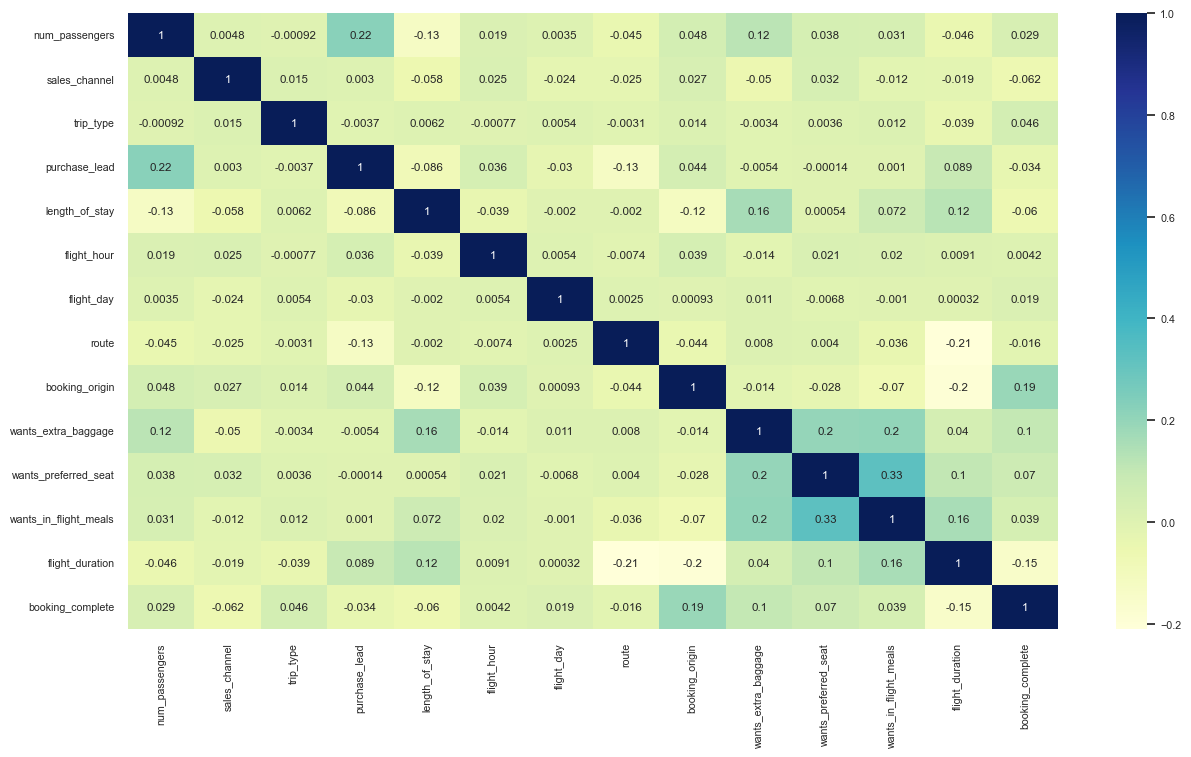

In [146]:
correlations = ros_df.corr()
plt.figure(figsize=(15,8))
sns.heatmap(correlations, annot=True,cmap="YlGnBu")

**Degree of correlation:**

- Perfect: If the value is near ± 1, then it said to be a perfect correlation: as one variable increases, the other variable tends to also increase (if positive) or decrease (if negative).
- High degree: If the coefficient value lies between ± 0.50 and ± 1, then it is said to be a strong correlation.
- Moderate degree: If the value lies between ± 0.30 and ± 0.49, then it is said to be a medium correlation.
- Low degree: When the value lies below + .29, then it is said to be a small correlation.
- No correlation: When the value is zero.

In [147]:
print(correlations["booking_complete"])

num_passengers           0.029281
sales_channel           -0.062218
trip_type                0.045833
purchase_lead           -0.033656
length_of_stay          -0.059599
flight_hour              0.004217
flight_day               0.018749
route                   -0.015788
booking_origin           0.188400
wants_extra_baggage      0.099733
wants_preferred_seat     0.070500
wants_in_flight_meals    0.038741
flight_duration         -0.148253
booking_complete         1.000000
Name: booking_complete, dtype: float64


**Based on the degree of correlation, we can safely assume that there is some sort of correlation(ranging from low degree to high degree) between the features and outcome/target values.**

#### Random Forest Classifier for feature importance

In [148]:
# Splitting X_features and y_target 

In [149]:
X_features = ros_df.drop('booking_complete', axis=1)
y_target = ros_df.booking_complete

#Print the shapes of X_features and y_target
X_features.shape,y_target.shape

((68040, 13), (68040,))

In [150]:
X_features

num_passengers  sales_channel  trip_type  purchase_lead  \
0                   2              1          2             94   
1                   1              1          2              8   
2                   2              0          2            210   
3                   2              0          2             63   
4                   2              0          2             26   
...               ...            ...        ...            ...   
68035               5              0          2             28   
68036               1              0          2            125   
68037               1              0          2             50   
68038               1              1          2            182   
68039               2              0          2            177   

       length_of_stay  flight_hour  flight_day  route  booking_origin  \
0                  35            6           1    717              51   
1                   5            5           1    377               4   
2                   3            4           4    432              43   
3                  29           13           1    574              50   
4                  20            7           4    375               4   
...               ...          ...         ...    ...             ...   
68035               5            8           3    436              80   
68036              54            1           1      6              51   
68037              27           11           5      6              51   
68038              22            3           4    102              37   
68039               6            9           1    427              51   

       wants_extra_baggage  wants_preferred_seat  wants_in_flight_meals  \
0                        1                     0                      0   
1                        0                     0                      0   
2                        0                     0                      0   
3                        1                     0                      0   
4                        1                     0                      1   
...                    ...                   ...                    ...   
68035                    0                     1                      1   
68036                    1                     0                      0   
68037                    1                     1                      0   
68038                    0                     0                      1   
68039                    1                     1                      0   

       flight_duration  
0                 4.67  
1                 5.62  
2                 6.62  
3                 4.75  
4                 8.83  
...                ...  
68035             6.62  
68036             8.83  
68037             8.83  
68038             6.62  
68039             6.62  

[68040 rows x 13 columns]

In [151]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.inspection import permutation_importance

#create model
rf = RandomForestClassifier(n_estimators=150)

#fit the model
rf.fit(X_features, y_target)

RandomForestClassifier(n_estimators=150)

(-1.0, 10.0)

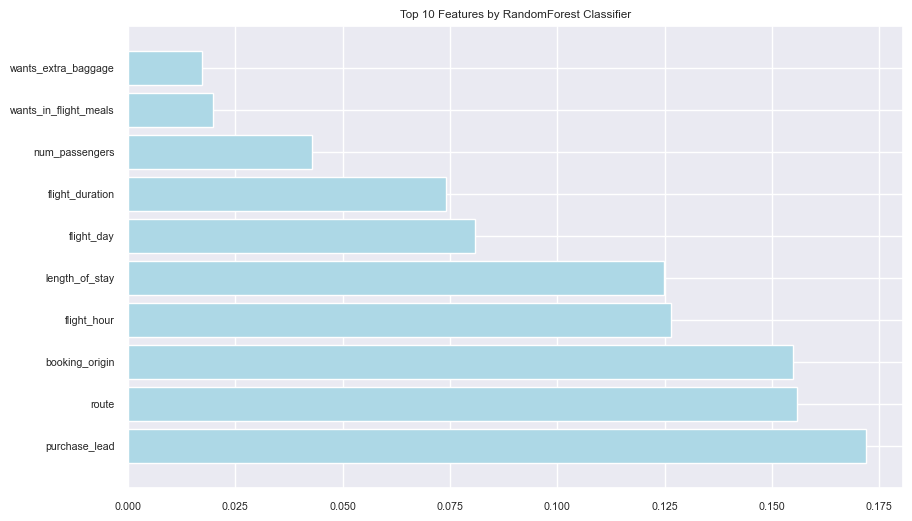

In [158]:
feat_names = X_features.columns.values
importances = rf.feature_importances_
indices = np.argsort(importances)[::-1][:10]

# Visualize feature importance
plt.subplots(figsize=(10,6))
plt.title("Top 10 Features by RandomForest Classifier")
plt.barh(range(len(indices)), importances[indices], color="lightblue", align="center")
plt.yticks(range(len(indices)), feat_names[indices], rotation='horizontal')
plt.ylim([-1, len(indices)])

#### Using TPOT to build our base model

In [160]:
import tpot
from sklearn.model_selection import StratifiedKFold
from tpot import TPOTClassifier

In [161]:
# model evaluation definition, 5 fold StratifiedKFold used here
cv = StratifiedKFold(n_splits=5)
# define TPOTClassifier
model = TPOTClassifier(generations=5, population_size=50, cv=cv, scoring='accuracy', verbosity=2, random_state=1, n_jobs=-1)
# performing the search for best fit
model.fit(X_features, y_target)
# exporting best model
model.export('tpot_data.py')

Optimization Progress:   0%|          | 0/300 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: 0.9382569077013521

Generation 2 - Current best internal CV score: 0.9382569077013521

Generation 3 - Current best internal CV score: 0.9533068783068783

Generation 4 - Current best internal CV score: 0.9533068783068783

Generation 5 - Current best internal CV score: 0.9791152263374485

Best pipeline: ExtraTreesClassifier(GradientBoostingClassifier(ExtraTreesClassifier(input_matrix, bootstrap=False, criterion=gini, max_features=0.15000000000000002, min_samples_leaf=1, min_samples_split=4, n_estimators=100), learning_rate=0.5, max_depth=9, max_features=0.9000000000000001, min_samples_leaf=2, min_samples_split=7, n_estimators=100, subsample=0.9000000000000001), bootstrap=False, criterion=gini, max_features=0.8500000000000001, min_samples_leaf=15, min_samples_split=3, n_estimators=100)


In [182]:
tpot_auc_score = roc_auc_score(y_valid, model.predict_proba(X_valid)[:, 1])
print(f'\nAUC score: {tpot_auc_score:.4f}')


AUC score: 0.5945


In [213]:
test_scores = []
train_scores = []

# Training set score
train_scores.append(model.score(X_features, y_target))

# Testing set score
test_scores.append(model.score(X_valid, y_valid))

In [1]:
train_scores, test_scores, tpot_auc_score

NameError: name 'train_scores' is not defined

Text(0.5, 24.049999999999997, 'Predicted label')

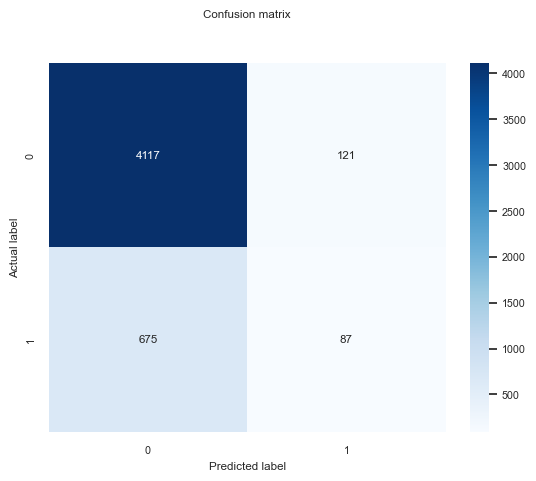

In [277]:
y_pred= model.predict(X_valid)
from sklearn import metrics
cf_matrix = metrics.confusion_matrix(y_valid, y_pred)
p = sns.heatmap(pd.DataFrame(cf_matrix), annot=True, cmap='Blues' ,fmt='g')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

#### Classification Report

In [278]:
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score,recall_score

print(classification_report(y_valid, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.97      0.91      4238
           1       0.42      0.11      0.18       762

    accuracy                           0.84      5000
   macro avg       0.64      0.54      0.55      5000
weighted avg       0.79      0.84      0.80      5000



In [218]:
f1_score(y_valid, y_pred), recall_score(y_valid, y_pred)

(0.1793814432989691, 0.1141732283464567)

**Our model did a poor job in identifying the 1s (booking complete, yes) compared to booking didnt go through, 0s in this case. Out of 762 of 1s, only 87 were correctly predicted. We need fine tune the model to increase the chances of predicting 1s more. That explains the low f1_score and recall_score as above.**

In [224]:
tpot_auc_score = roc_auc_score(y_valid, model.predict_proba(X_valid)[:, 1])
print(f'\nAUC score: {tpot_auc_score:.4f}')


AUC score: 0.5945


**Higher the AUC, the better the model is at predicting 0 classes as 0 and 1 classes as 1**

#### Hyperparameter tuning using RandomSearch CV|

In [265]:
exported_pipeline.get_params().keys()

dict_keys(['memory', 'steps', 'verbose', 'stackingestimator-1', 'stackingestimator-2', 'extratreesclassifier', 'stackingestimator-1__estimator__bootstrap', 'stackingestimator-1__estimator__ccp_alpha', 'stackingestimator-1__estimator__class_weight', 'stackingestimator-1__estimator__criterion', 'stackingestimator-1__estimator__max_depth', 'stackingestimator-1__estimator__max_features', 'stackingestimator-1__estimator__max_leaf_nodes', 'stackingestimator-1__estimator__max_samples', 'stackingestimator-1__estimator__min_impurity_decrease', 'stackingestimator-1__estimator__min_samples_leaf', 'stackingestimator-1__estimator__min_samples_split', 'stackingestimator-1__estimator__min_weight_fraction_leaf', 'stackingestimator-1__estimator__n_estimators', 'stackingestimator-1__estimator__n_jobs', 'stackingestimator-1__estimator__oob_score', 'stackingestimator-1__estimator__random_state', 'stackingestimator-1__estimator__verbose', 'stackingestimator-1__estimator__warm_start', 'stackingestimator-1__

In [268]:
# Run RandomizedSearchCV to tune the hyper-parameter
from sklearn.model_selection import RandomizedSearchCV


k_fold_cv = 5 # Stratified 5-fold cross validation
params = {
    
    "stackingestimator-1__estimator__bootstrap" : [True, False],
    "stackingestimator-1__estimator__criterion" : ['gini','log_loss','entropy'],
    "stackingestimator-1__estimator__max_depth" : [3,6,9],
    "stackingestimator-2__estimator__criterion" : ["friedman_mse",  "mae", 'gini'],
    "stackingestimator-2__estimator__ccp_alpha":[0.01, 0.025, 0.05, 0.075, 0.1, 0.15, 0.2],
    "stackingestimator-2__estimator__min_samples_split": np.linspace(0.1, 0.5, 12),
    "stackingestimator-2__estimator__min_samples_leaf": np.linspace(0.1, 0.5, 12),
    "extratreesclassifier__max_depth" : [2, 4, 6, 8],
    "extratreesclassifier__min_samples_split":np.linspace(0.1, 0.5, 12),
    "extratreesclassifier__min_samples_leaf": np.linspace(0.1, 0.5, 12),
     }
random = RandomizedSearchCV(exported_pipeline, param_distributions=params, cv=k_fold_cv,random_state=42)
random.fit(X_valid, y_valid)
print('Best hyper parameter:', random.best_params_)
print("Best CV Score", random.best_score_)

Best hyper parameter: {'stackingestimator-2__estimator__min_samples_split': 0.390909090909091, 'stackingestimator-2__estimator__min_samples_leaf': 0.2090909090909091, 'stackingestimator-2__estimator__criterion': 'friedman_mse', 'stackingestimator-2__estimator__ccp_alpha': 0.025, 'stackingestimator-1__estimator__max_depth': 6, 'stackingestimator-1__estimator__criterion': 'log_loss', 'stackingestimator-1__estimator__bootstrap': True, 'extratreesclassifier__min_samples_split': 0.31818181818181823, 'extratreesclassifier__min_samples_leaf': 0.5, 'extratreesclassifier__max_depth': 6}
Best CV Score 0.8475999999999999


#### Using best hyper parameters 

In [270]:
from sklearn.ensemble import ExtraTreesClassifier, GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline, make_union
from tpot.builtins import StackingEstimator
from tpot.export_utils import set_param_recursive

features = X_valid
target = y_valid

exported_pipeline = make_pipeline(
    StackingEstimator(estimator=ExtraTreesClassifier(bootstrap=True, criterion="log_loss", max_features=0.15000000000000002, min_samples_leaf=1, min_samples_split=4, n_estimators=100, max_depth=6)),
    StackingEstimator(estimator=GradientBoostingClassifier(criterion = 'friedman_mse',learning_rate=0.025, max_depth=9, max_features=0.9000000000000001, min_samples_leaf=0.2090909090909091, min_samples_split=0.390909090909091, n_estimators=100, subsample=0.9000000000000001)),
    ExtraTreesClassifier(bootstrap=False, criterion="gini",max_depth=6, max_features=0.8500000000000001, min_samples_leaf=0.5, min_samples_split=0.3181818181818182, n_estimators=100)
)
# Fix random state for all the steps in exported pipeline
set_param_recursive(exported_pipeline.steps, 'random_state', 1)

exported_pipeline.fit(features, target)
y_pred = exported_pipeline.predict(X_test)

In [271]:
tpot_auc_score = roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])
print(f'\nAUC score: {tpot_auc_score:.4f}')


AUC score: 0.5752
